# Initial setup

In [23]:
import sys
import os

sys.path.append(r'C:\Users\angel\Documents\GitHub\gr4sp\experiments\EMAworkbench')
sys.path.append(r'C:\Users\angel\Documents\GitHub\gr4sp\experiments')

import pandas as pd
import matplotlib.cm as cm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
from ema_workbench.analysis import prim
#import pareto
import os
import glob
import numpy as np
import pandas as pd
import os
import glob
import datetime as DT



## Load results (Sobol and BAUs)

In [5]:
from ema_workbench import load_results

results = load_results(r'C:/Users/angel/Documents/GitHub/gr4sp/experiments/simulationData/gr4sp_SOBOL2021-Feb-03.tar.gz')
ev_results_df = pd.read_excel(r'C:/Users/angel/Documents/GitHub/gr4sp/experiments/notebookGr4sp/outputs/data/EV_all_sobol.xlsx', index_col=[0])

In [7]:
experiments, outcomes = results
experiments.describe()

,annualCpi,annualInflation,consumption,domesticConsumptionPercentage,energyEfficiency,generationRolloutPeriod,generatorRetirement,importPriceFactor,includePublicallyAnnouncedGen,learningCurve,...,priceChangePercentageBrownCoal,priceChangePercentageOcgt,priceChangePercentageWater,priceChangePercentageWind,rooftopPV,scheduleMinCapMarketGen,semiScheduleGenSpotMarket,semiScheduleMinCapMarketGen,solarUptake,wholesaleTariffContribution
count,126000.000000,126000.000000,126000.000000,126000.000000,126000.000000,126000.000000,126000.000000,126000.000000,126000.000000,126000.000000,...,126000.000000,126000.000000,126000.000000,126000.000000,126000.000000,126000.000000,126000.000000,126000.000000,126000.000000,126000.000000
mean,3.000238,2.998810,1.999048,34.990000,1.000714,5.497143,-0.001429,-0.007143,0.500000,7.497143,...,-0.018333,0.006190,0.005000,0.000714,5.999524,150.541905,8.998333,150.370476,2.001429,27.503810
std,1.415313,1.415313,1.414556,8.939456,0.816645,2.872126,3.161913,29.152702,0.500002,4.609583,...,29.153567,29.154507,29.151743,29.152674,0.816208,86.593375,0.816061,86.599359,1.414892,10.387143
min,1.000000,1.000000,0.000000,20.000000,0.000000,1.000000,-5.000000,-50.000000,0.000000,0.000000,...,-50.000000,-50.000000,-50.000000,-50.000000,5.000000,1.000000,8.000000,1.000000,0.000000,10.000000
25%,2.000000,2.000000,1.000000,27.000000,0.000000,3.000000,-3.000000,-25.000000,0.000000,3.750000,...,-25.000000,-25.000000,-25.000000,-25.000000,5.000000,75.750000,8.000000,75.750000,1.000000,18.750000
50%,3.000000,3.000000,2.000000,35.000000,1.000000,5.500000,0.000000,0.000000,0.500000,7.500000,...,0.000000,0.000000,0.000000,0.000000,6.000000,150.500000,9.000000,150.500000,2.000000,27.500000
75%,4.000000,4.000000,3.000000,43.000000,2.000000,8.000000,3.000000,25.000000,1.000000,11.250000,...,25.000000,25.000000,25.000000,25.000000,7.000000,225.250000,10.000000,225.250000,3.000000,36.250000
max,5.000000,5.000000,4.000000,50.000000,2.000000,10.000000,5.000000,50.000000,1.000000,15.000000,...,50.000000,50.000000,50.000000,50.000000,7.000000,300.000000,10.000000,300.000000,4.000000,45.000000


In [8]:
bau_scenario_id = max(experiments['scenario']) + 1

new_row = pd.DataFrame({'annualCpi': 2.33, 'annualInflation': 3.3, 'importPriceFactor': 29, 'nameplateCapacityChangeBrownCoal': 0,
       'nameplateCapacityChangeWater': 0,'nameplateCapacityChangeBattery': 0,
        'nameplateCapacityChangeSolar': 0, 'nameplateCapacityChangeWind': 0,
        'nameplateCapacityChangeOcgt': 0, 'consumption': 0, 'energyEfficiency': 0,
       'generationRolloutPeriod':1, 'generatorRetirement':0,
       'includePublicallyAnnouncedGen':0, 'learningCurve':5,
       'nonScheduleGenSpotMarket': 10, 'nonScheduleMinCapMarketGen':1,
       'priceChangePercentageBrownCoal':0, 'priceChangePercentageOcgt':0,
       'priceChangePercentageWater':0, 'priceChangePercentageWind':0, 'priceChangePercentageBattery':0, 'rooftopPV':7,
       'domesticConsumptionPercentage':30,
       'scheduleMinCapMarketGen':300, 'semiScheduleGenSpotMarket':8,
       'semiScheduleMinCapMarketGen':300, 'solarUptake':0,
        'wholesaleTariffContribution':28.37, 'scenario': bau_scenario_id,
       'policy': "None", 'model': 'Gr4sp'}, index =[0]) 
# simply concatenate both dataframes 
experiments = pd.concat([experiments,new_row],sort=True).reset_index(drop = True) 

# rename none in policy column into constant value 0. PRIM fails otherwise.
if "None" in experiments["policy"].unique():
    experiments["policy"] = experiments["policy"].replace("None",int(0))

In [9]:
#Results for BAU were generated with the 'light' setting in the model.
bau_results_df = pd.read_csv(r'C:/Users/angel/Documents/GitHub/gr4sp/experiments/simulationData/VICSimDataYearSummary_160221-BAU-1998-2051.csv')
bau_results_df.head()

,Time (Year),Consumption (KWh) per household,Avg Tariff (c/KWh) per household,Primary Wholesale ($/MWh),GHG Emissions (tCO2-e) per household,Number of Domestic Consumers (households),Percentage Renewable Production,System Production Primary Spot,System Production Secondary Spot,System Production Off Spot,...,285000 - Battery - Gannawarra Energy Storage System - 25.33 - S - 2020 - 2033 - OffSpot,293000 - Wind - Berrybank Wind Farm - 180.6 - SS - 2020 - 2050 - Primary,295000 - Wind - Moorabool Wind Farm - 320.32 - SS - 2020 - 2044 - Primary,297000 - Wind - Stockyard Hill Wind Farm - 531.93 - SS - 2020 - 2045 - Primary,301000 - Wind - Cherry Tree Wind Farm - 57.6 - SS - 2020 - 2050 - Primary,303000 - Solar - Carwarp Solar Farm - Stage I - 100.0 - SS - 2020 - 2050 - Primary,305000 - Wind - Dundonnell Wind Farm - 336.0 - SS - 2020 - 2045 - Primary,308000 - Wind - Mortlake South Wind Farm - 157.5 - SS - 2020 - 2050 - Primary,317000 - Solar - Winton Asset Co. Pty Ltd as Trustee of the Winton Asset Trust - 85.0 - SS - 2021 - 2051 - Primary,331000 - Solar - Kiamal Solar Farm - Stage 2 - 149.96 - SS - 2022 - 2052 - Primary
0,1998,7274.621326,26.621281,0.000000,9.241233,1637917.0,0.019037,0.000000e+00,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1999,7972.760042,23.351999,17.529518,10.169690,1666850.0,0.024080,4.417793e+07,0.0,443764.080000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2000,8336.261405,14.290676,25.878248,10.462258,1695784.0,0.034438,4.693226e+07,0.0,444979.872000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2001,8225.690958,15.696864,22.072247,10.284990,1724718.0,0.035015,4.694292e+07,0.0,592307.850000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2002,8195.767319,10.385764,25.678888,10.154013,1753652.0,0.041821,4.746060e+07,0.0,752769.978226,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
seed_bau = bau_scenario_id + 1
outcomes['TIMEYear'] = np.append(outcomes['TIMEYear'],
                                          [bau_results_df['Time (Year)'].values], axis=0)
outcomes['consumptionYear'] = np.append(outcomes['consumptionYear'],
                                                 [bau_results_df['Consumption (KWh) per household'].values], axis=0)
outcomes['tariffsYear'] = np.append(outcomes['tariffsYear'],
                                                 [bau_results_df['Avg Tariff (c/KWh) per household'].values], axis=0)
outcomes['wholesalePriceYear'] = np.append(outcomes['wholesalePriceYear'],
                                                 [bau_results_df['Primary Wholesale ($/MWh)'].values], axis=0)
outcomes['GHGYear'] = np.append(outcomes['GHGYear'],
                                                 [bau_results_df['GHG Emissions (tCO2-e) per household'].values], axis=0)
outcomes['numConsumersYear'] = np.append(outcomes['numConsumersYear'],
                                                 [bau_results_df['Number of Domestic Consumers (households)'].values], axis=0)
outcomes['primarySpotProductionYear'] = np.append(outcomes['primarySpotProductionYear'],
                                                 [bau_results_df['System Production Primary Spot'].values], axis=0)
outcomes['secondarySpotProductionYear'] = np.append(outcomes['secondarySpotProductionYear'],
                                                 [bau_results_df['System Production Secondary Spot'].values], axis=0)
outcomes['offSpotProductionYear'] = np.append(outcomes['offSpotProductionYear'],
                                                 [bau_results_df['System Production Off Spot'].values], axis=0)
outcomes['renewableContributionYear'] = np.append(outcomes['renewableContributionYear'],
                                                 [bau_results_df['Percentage Renewable Production'].values], axis=0)
outcomes['rooftopPVProductionYear'] = np.append(outcomes['rooftopPVProductionYear'],
                                                 [bau_results_df['System Production Rooftop PV'].values], axis=0)
outcomes['coalProductionYear'] = np.append(outcomes['coalProductionYear'],
                                                 [bau_results_df['System Production Coal'].values], axis=0)
outcomes['windProductionYear'] = np.append(outcomes['windProductionYear'],
                                                 [bau_results_df['System Production Wind'].values], axis=0)
outcomes['gasProductionYear'] = np.append(outcomes['gasProductionYear'],
                                                 [bau_results_df['System Production Gas'].values], axis=0)
outcomes['solarProductionYear'] = np.append(outcomes['solarProductionYear'],
                                                 [bau_results_df['System Production Solar'].values], axis=0)   
outcomes['waterProductionYear'] = np.append(outcomes['waterProductionYear'],
                                                 [bau_results_df['System Production Water'].values], axis=0)
outcomes['BatteryProductionYear'] = np.append(outcomes['BatteryProductionYear'],
                                                 [bau_results_df['System Production Battery'].values], axis=0)
outcomes['numActorsYear'] = np.append(outcomes['numActorsYear'],
                                                 [bau_results_df['Number of Active Actors'].values], axis=0)
outcomes['primaryUnmetDemandMwh'] = np.append(outcomes['primaryUnmetDemandMwh'],
                                                 [bau_results_df['Primary Total Unmet Demand (MWh)'].values], axis=0)
outcomes['primaryUnmetDemandHours'] = np.append(outcomes['primaryUnmetDemandHours'],
                                                 [bau_results_df['Primary Total Unmet Demand (Hours)'].values], axis=0)
outcomes['primaryUnmetDemandDays'] = np.append(outcomes['primaryUnmetDemandDays'],
                                                 [bau_results_df['Primary Total Unmet Demand (Days)'].values], axis=0)
outcomes['primaryMaxUnmetDemandMwhPerHour'] = np.append(outcomes['primaryMaxUnmetDemandMwhPerHour'],
                                                 [bau_results_df['Primary Max Unmet Demand Per Hour (MWh)'].values], axis=0)
outcomes['secondaryUnmetDemandMwh'] = np.append(outcomes['secondaryUnmetDemandMwh'],
                                                 [bau_results_df['Secondary Total Unmet Demand (MWh)'].values], axis=0)
outcomes['secondaryUnmetDemandHours'] = np.append(outcomes['secondaryUnmetDemandHours'],
                                                 [bau_results_df['Secondary Total Unmet Demand (Hours)'].values], axis=0)
outcomes['secondaryUnmetDemandDays'] = np.append(outcomes['secondaryUnmetDemandDays'],
                                                 [bau_results_df['Secondary Total Unmet Demand (Days)'].values], axis=0)
outcomes['secondaryMaxUnmetDemandMwhPerHour'] = np.append(outcomes['secondaryMaxUnmetDemandMwhPerHour'],
                                                 [bau_results_df['Secondary Max Unmet Demand Per Hour (MWh)'].values], axis=0)

outcomes['seedExperimentCsv'] = np.append(outcomes['seedExperimentCsv'], [seed_bau], axis=0)


In [11]:
outcomes['PrimarySpot-WholesalePriceYear'] = outcomes['wholesalePriceYear']

outcomes_to_show = ['consumptionYear', 'tariffsYear', 'PrimarySpot-WholesalePriceYear', 'GHGYear', 
                    'numConsumersYear', 'primarySpotProductionYear', 'secondarySpotProductionYear', 
                    'offSpotProductionYear', 'renewableContributionYear', 'rooftopPVProductionYear', 
                    'coalProductionYear', 'waterProductionYear', 'windProductionYear', 'gasProductionYear', 
                    'solarProductionYear', 'BatteryProductionYear', 'numActorsYear', 'primaryUnmetDemandMwh', 
                    'primaryUnmetDemandHours', 'primaryUnmetDemandDays', 'primaryMaxUnmetDemandMwhPerHour', 
                    'secondaryUnmetDemandMwh', 'secondaryUnmetDemandHours', 'secondaryUnmetDemandDays', 
                    'secondaryMaxUnmetDemandMwhPerHour']

# 23 levers/uncertainties selected after EET (last test July 2020)
# 25 uncertainties selected aftet EET including change on domestic demand and unmet demand output (August 2020)
uncertainties = experiments.columns[:-3]

#from startYear
startYear = 2000
startYearShift = (startYear - 1998)

time = outcomes['TIMEYear'][0, startYearShift:]

points_of_interest = [*range(2020,2051,10)] 
#points_of_interest = [*range(2000,2019,5)] 

points_of_interest = [ x - startYear for x in points_of_interest]

# Filter outcomes taking into account the startYear, and removing Seed Experiment info. 
# Seed it is useful if I want to retrieve more info from the csv files, or redo the experiments with the
# simulation parameters
outcomes_filtered = {k:v[:, startYearShift:] for k,v in outcomes.items() if k != 'seedExperimentCsv'}

In [12]:
ooi = 'GHGYear'
data_GHG_household = outcomes_filtered[ooi]

""" Converts household data in tCO2e into total residential data in MtCO2e"""
data_GHG_residential = (data_GHG_household * outcomes_filtered['numConsumersYear']) / 1000000.0
data_GHG_residential_bau = (bau_results_df['GHG Emissions (tCO2-e) per household'] * bau_results_df['Number of Domestic Consumers (households)']) / 1000000.0

""" Applies scaling factor used in simulation, so that data represents total emissions, not only residential (30%)"""
data_GHG_total = data_GHG_residential / 0.3
data_GHG_total_bau = data_GHG_residential_bau / 0.3


"""Overwrite GHG with the data of interest"""
outcomes_filtered[ooi] = data_GHG_total
bau_results_df[ooi] = data_GHG_total_bau

In [13]:
ooi = 'consumptionYear'
data_consumption_household = outcomes_filtered[ooi]

In [14]:
""" Converts household data in KWh into total residential data in MWh"""
data_consumption_residential = (data_consumption_household * outcomes_filtered['numConsumersYear']) / 1000.0

""" Applies scaling factor used in simulation, so that data represents total consumption, not only residential"""
data_consumption_total = data_consumption_residential / 0.3

"""Overwrite Consumption with the data of interest"""
outcomes_filtered[ooi] = data_consumption_total

In [83]:
primary = bau_results_df['System Production Primary Spot']
secondary = bau_results_df['System Production Secondary Spot']
off = bau_results_df['System Production Off Spot']
unmetPrimary = bau_results_df['Primary Total Unmet Demand (MWh)']
unmetSecondary = bau_results_df['Secondary Total Unmet Demand (MWh)']

consumptionPrimary = primary + off + unmetPrimary
consumptionSecondary = secondary + off + unmetSecondary

percentageUnmetPrimary = (unmetPrimary/consumptionPrimary)*100
percentageUnmetSecondary = (unmetSecondary/consumptionSecondary)*100
    
where_are_NaNs = np.isnan(percentageUnmetPrimary)
percentageUnmetPrimary[where_are_NaNs] = 0

where_are_NaNs = np.isnan(percentageUnmetSecondary)
percentageUnmetSecondary[where_are_NaNs] = 0

bau_results_df['unmetPercentageConsumptionPrimary'] = percentageUnmetPrimary
bau_results_df['unmetPercentageConsumptionSecondary'] = percentageUnmetSecondary

## LCT graphs different key drivers

### Box 4: 
includePublicallyAnnounced = True
generationRetirementPeriod = from 2 to -5

In [949]:
## All combinations box 4: include publically announced True, and generation retirement from 2 to -5 (7 lines + BAU)

#incPAgenRetm5 = pd.read_csv(r'C:/Users/angel/Documents/GitHub/gr4sp/csv/LCTVIC/LCTVICSimDataYearSummary_seed_1627813932504.csv')
incPAgenRetm5 = pd.read_csv(r'C:/Users/angel/Documents/GitHub/gr4sp/csv/LCTVIC/LCTVICSimDataYearSummary_seed_1628064587050.csv')
incPAgenRetm4 = pd.read_csv(r'C:/Users/angel/Documents/GitHub/gr4sp/csv/LCTVIC/LCTVICSimDataYearSummary_seed_1627813772829.csv')
incPAgenRetm3 = pd.read_csv(r'C:/Users/angel/Documents/GitHub/gr4sp/csv/LCTVIC/LCTVICSimDataYearSummary_seed_1627813595417.csv')
incPAgenRetm2 = pd.read_csv(r'C:/Users/angel/Documents/GitHub/gr4sp/csv/LCTVIC/LCTVICSimDataYearSummary_seed_1627639289894.csv')
incPAgenRetm1 = pd.read_csv(r'C:/Users/angel/Documents/GitHub/gr4sp/csv/LCTVIC/LCTVICSimDataYearSummary_seed_1627639136805.csv')
incPAgenRet0 = pd.read_csv(r'C:/Users/angel/Documents/GitHub/gr4sp/csv/LCTVIC/LCTVICSimDataYearSummary_seed_1627638141723.csv')
incPAgenRet1 = pd.read_csv(r'C:/Users/angel/Documents/GitHub/gr4sp/csv/LCTVIC/LCTVICSimDataYearSummary_seed_1627637979488.csv')
incPAgenRet2 = pd.read_csv(r'C:/Users/angel/Documents/GitHub/gr4sp/csv/LCTVIC/LCTVICSimDataYearSummary_seed_1627636704280.csv')

""" Converts household data in tCO2e into total residential data in MtCO2e"""
incPAgenRetm5_GHG_residential_lct = (incPAgenRetm5['GHG Emissions (tCO2-e) per household'] * incPAgenRetm5['Number of Domestic Consumers (households)']) / 1000000.0

""" Applies scaling factor used in simulation, so that data represents total emissions, not only residential (30%)"""
incPAgenRetm5_GHG_total_lct =incPAgenRetm5_GHG_residential_lct / 0.3

"""Overwrite GHG with the data of interest"""
incPAgenRetm5['GHGYear'] = incPAgenRetm5_GHG_total_lct

""" Converts household data in tCO2e into total residential data in MtCO2e"""
incPAgenRetm4_GHG_residential_lct = (incPAgenRetm4['GHG Emissions (tCO2-e) per household'] * incPAgenRetm4['Number of Domestic Consumers (households)']) / 1000000.0

""" Applies scaling factor used in simulation, so that data represents total emissions, not only residential (30%)"""
incPAgenRetm4_GHG_total_lct =incPAgenRetm4_GHG_residential_lct / 0.3

"""Overwrite GHG with the data of interest"""
incPAgenRetm4['GHGYear'] = incPAgenRetm4_GHG_total_lct


""" Converts household data in tCO2e into total residential data in MtCO2e"""
incPAgenRetm3_GHG_residential_lct = (incPAgenRetm3['GHG Emissions (tCO2-e) per household'] * incPAgenRetm3['Number of Domestic Consumers (households)']) / 1000000.0

""" Applies scaling factor used in simulation, so that data represents total emissions, not only residential (30%)"""
incPAgenRetm3_GHG_total_lct =incPAgenRetm3_GHG_residential_lct / 0.3

"""Overwrite GHG with the data of interest"""
incPAgenRetm3['GHGYear'] = incPAgenRetm3_GHG_total_lct


""" Converts household data in tCO2e into total residential data in MtCO2e"""
incPAgenRetm2_GHG_residential_lct = (incPAgenRetm2['GHG Emissions (tCO2-e) per household'] * incPAgenRetm2['Number of Domestic Consumers (households)']) / 1000000.0

""" Applies scaling factor used in simulation, so that data represents total emissions, not only residential (30%)"""
incPAgenRetm2_GHG_total_lct =incPAgenRetm2_GHG_residential_lct / 0.3

"""Overwrite GHG with the data of interest"""
incPAgenRetm2['GHGYear'] = incPAgenRetm2_GHG_total_lct


""" Converts household data in tCO2e into total residential data in MtCO2e"""
incPAgenRetm1_GHG_residential_lct = (incPAgenRetm1['GHG Emissions (tCO2-e) per household'] * incPAgenRetm1['Number of Domestic Consumers (households)']) / 1000000.0

""" Applies scaling factor used in simulation, so that data represents total emissions, not only residential (30%)"""
incPAgenRetm1_GHG_total_lct =incPAgenRetm1_GHG_residential_lct / 0.3

"""Overwrite GHG with the data of interest"""
incPAgenRetm1['GHGYear'] = incPAgenRetm1_GHG_total_lct

""" Converts household data in tCO2e into total residential data in MtCO2e"""
incPAgenRet0_GHG_residential_lct = (incPAgenRet0['GHG Emissions (tCO2-e) per household'] * incPAgenRet0['Number of Domestic Consumers (households)']) / 1000000.0

""" Applies scaling factor used in simulation, so that data represents total emissions, not only residential (30%)"""
incPAgenRet0_GHG_total_lct =incPAgenRet0_GHG_residential_lct / 0.3

"""Overwrite GHG with the data of interest"""
incPAgenRet0['GHGYear'] = incPAgenRet0_GHG_total_lct

""" Converts household data in tCO2e into total residential data in MtCO2e"""
incPAgenRet1_GHG_residential_lct = (incPAgenRet1['GHG Emissions (tCO2-e) per household'] * incPAgenRet1['Number of Domestic Consumers (households)']) / 1000000.0

""" Applies scaling factor used in simulation, so that data represents total emissions, not only residential (30%)"""
incPAgenRet1_GHG_total_lct =incPAgenRet1_GHG_residential_lct / 0.3

"""Overwrite GHG with the data of interest"""
incPAgenRet1['GHGYear'] = incPAgenRet1_GHG_total_lct

""" Converts household data in tCO2e into total residential data in MtCO2e"""
incPAgenRet2_GHG_residential_lct = (incPAgenRet2['GHG Emissions (tCO2-e) per household'] * incPAgenRet2['Number of Domestic Consumers (households)']) / 1000000.0

""" Applies scaling factor used in simulation, so that data represents total emissions, not only residential (30%)"""
incPAgenRet2_GHG_total_lct =incPAgenRet2_GHG_residential_lct / 0.3

"""Overwrite GHG with the data of interest"""
incPAgenRet2['GHGYear'] = incPAgenRet2_GHG_total_lct




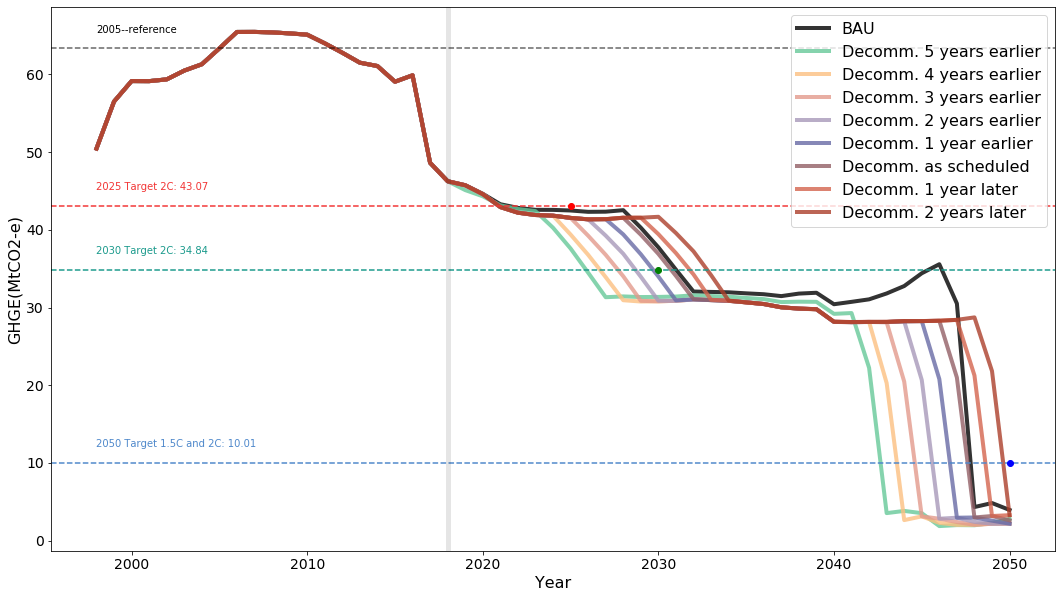

In [950]:
# Figures combinations from box 4 best cases PRIM. Include publically annonced in true and generation retirement changes from 2 to -5.
plt.figure(figsize=(18,10))
years = [DT.datetime.strptime(str(int(date)),'%Y') for date in bau_results_df['Time (Year)'].values]
years =  bau_results_df['Time (Year)'].values
plt.plot( years, bau_results_df['GHGYear'], color='black', alpha = 0.8, linewidth=4, label='BAU')
plt.plot( years, incPAgenRetm5['GHGYear'],  color='#67c999', alpha = 0.8, linewidth=4, label='Decomm. 5 years earlier')
plt.plot( years, incPAgenRetm4['GHGYear'],  color='#fcc081',  alpha = 0.8, linewidth=4, label='Decomm. 4 years earlier')
plt.plot( years, incPAgenRetm3['GHGYear'],  color='#e39a8c', alpha = 0.8, linewidth=4, label='Decomm. 3 years earlier')
plt.plot( years, incPAgenRetm2['GHGYear'],  color='#a899ba',  alpha = 0.8, linewidth=4, label='Decomm. 2 years earlier')
plt.plot( years, incPAgenRetm1['GHGYear'],  color='#686ba5',  alpha = 0.8, linewidth=4, label='Decomm. 1 year earlier')
plt.plot( years, incPAgenRet0['GHGYear'],  color='#925f66',  alpha = 0.8, linewidth=4, label='Decomm. as scheduled')
plt.plot( years, incPAgenRet1['GHGYear'],  color='#d4644e',  alpha = 0.8, linewidth=4, label='Decomm. 1 year later')
plt.plot( years, incPAgenRet2['GHGYear'],  color='#ac3f2a',  alpha = 0.8, linewidth=4, label='Decomm. 2 years later')

# Add dot and corresponding text
reference = bau_results_df[bau_results_df['Time (Year)'] == 2005]['GHGYear'].values

reduction = 0.32

plt.axhline((reference - (reference * reduction)), ls='--',color='#f23535', alpha = 1)

plt.text(years[0], reference - (reference * reduction)+2, f'2025 Target 2C: {((reference - (reference * reduction))[0]):.2f}',color='#f23535')
plt.plot(2025, (reference - (reference * reduction)), 'ro')

# reduction = 0.39

# plt.axhline((reference - (reference * reduction)), ls='--',color='red', alpha = 0.6)

# plt.text(years[0], reference - (reference * reduction)+2, f'2025 Target1.5: {((reference - (reference * reduction))[0]):.2f}',color='red')
# plt.plot(2025, (reference - (reference * reduction)), 'ro')

reduction = 0.45

plt.axhline((reference - (reference * reduction)) ,ls='--',color='#1b9a8c', alpha = 1)
plt.text(years[0], reference - (reference * reduction)+2, f'2030 Target 2C: {((reference - (reference * reduction))[0]):.2f}',color='#1b9a8c')
plt.plot(2030, (reference - (reference * reduction)), 'go')

# reduction = 0.60

# plt.axhline((reference - (reference * reduction)) ,ls='--',color='green', alpha = 0.6)
# plt.text(years[0], reference - (reference * reduction)+2, f'2030 Target 1.5: {((reference - (reference * reduction))[0]):.2f}',color='green')
# plt.plot(2030, (reference - (reference * reduction)), 'go')

reduction = 0.842

plt.axhline((reference - (reference * reduction)) ,ls='--',color='#4e88cb', alpha = 1)
plt.text(years[0], reference - (reference * reduction)+2, f'2050 Target 1.5C and 2C: {((reference - (reference * reduction))[0]):.2f}',color='#4e88cb')
plt.plot(2050, (reference - (reference * reduction)), 'bo')

plt.axvline(2018, ls='-',color='black', alpha = 0.1, lw = 5)

plt.axhline((reference),ls='--',color='black', alpha = 0.6)
plt.text(years[0], reference+2, f'2005--reference',color='black')


#plt.grid( linestyle='-', linewidth=1)
plt.xlabel('Year', size=16)
plt.ylabel('GHGE(MtCO2-e)', size=16)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.legend(prop={'size':16}, loc='upper right')

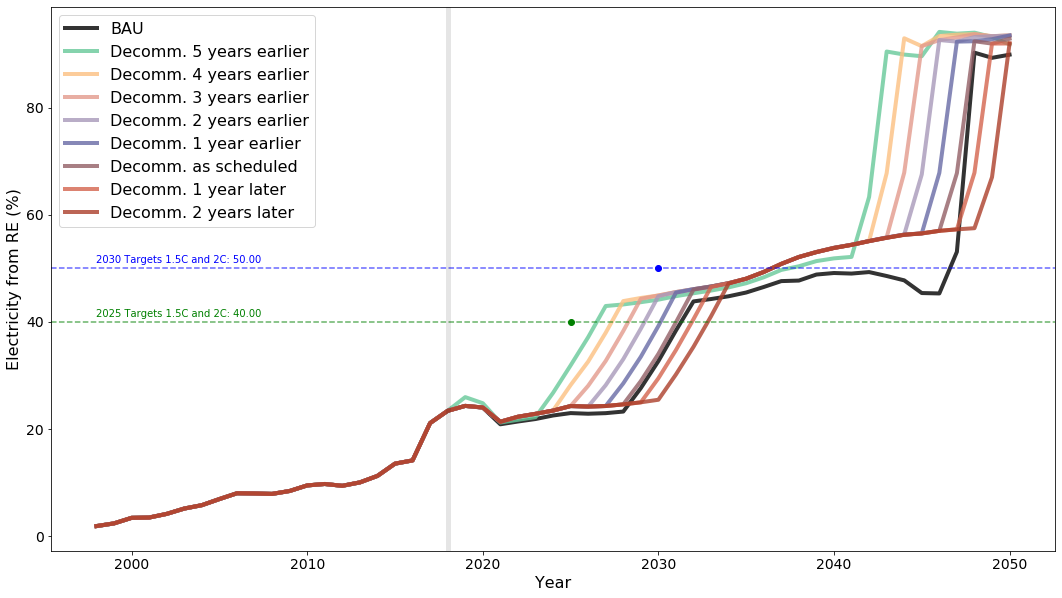

In [951]:
plt.figure(figsize=(18,10))
years = [DT.datetime.strptime(str(int(date)),'%Y') for date in bau_results_df['Time (Year)'].values]
years =  bau_results_df['Time (Year)'].values
plt.plot( years, bau_results_df['Percentage Renewable Production']*100, color='black', alpha = 0.8, linewidth=4, label='BAU')
plt.plot( years, incPAgenRetm5['Percentage Renewable Production']*100,  color='#67c999', alpha = 0.8, linewidth=4, label='Decomm. 5 years earlier')
plt.plot( years, incPAgenRetm4['Percentage Renewable Production']*100,  color='#fcc081',  alpha = 0.8, linewidth=4, label='Decomm. 4 years earlier')
plt.plot( years, incPAgenRetm3['Percentage Renewable Production']*100,  color='#e39a8c', alpha = 0.8, linewidth=4, label='Decomm. 3 years earlier')
plt.plot( years, incPAgenRetm2['Percentage Renewable Production']*100,  color='#a899ba',  alpha = 0.8, linewidth=4, label='Decomm. 2 years earlier')
plt.plot( years, incPAgenRetm1['Percentage Renewable Production']*100,  color='#686ba5',  alpha = 0.8, linewidth=4, label='Decomm. 1 year earlier')
plt.plot( years, incPAgenRet0['Percentage Renewable Production']*100,  color='#925f66',  alpha = 0.8, linewidth=4, label='Decomm. as scheduled')
plt.plot( years, incPAgenRet1['Percentage Renewable Production']*100,  color='#d4644e',  alpha = 0.8, linewidth=4, label='Decomm. 1 year later')
plt.plot( years, incPAgenRet2['Percentage Renewable Production']*100,  color='#ac3f2a',  alpha = 0.8, linewidth=4, label='Decomm. 2 years later')

# Add dot and corresponding text

target = 40

plt.axhline(  target ,ls='--',color='green', alpha = 0.6)
plt.text(years[0], target+1, f'2025 Targets 1.5C and 2C: {target:.2f}',color='green')
plt.plot(2025, target, 'go')

target = 50
plt.axhline(  target ,ls='--',color='blue', alpha = 0.6)
plt.text(years[0], target+1, f'2030 Targets 1.5C and 2C: {target:.2f}',color='blue')
plt.plot(2030, target, 'bo')
plt.axvline(2018, ls='-',color='black', alpha = 0.1, lw = 5)

#plt.grid( linestyle='-', linewidth=1)
plt.xlabel('Year', size=16)
plt.ylabel('Electricity from RE (%)', size=16)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.legend(prop={'size':16})

In [952]:
#Box 4 best-cases PRIM
#Decom. 5 years earlier
incPAgenRetm5LCTprimary = incPAgenRetm5['System Production Primary Spot']
incPAgenRetm5LCTunmetPrimary = incPAgenRetm5['Primary Total Unmet Demand (MWh)']
incPAgenRetm5LCToff = incPAgenRetm5['System Production Off Spot']

incPAgenRetm5LCTconsumptionPrimary = incPAgenRetm5LCTprimary + incPAgenRetm5LCToff + incPAgenRetm5LCTunmetPrimary
incPAgenRetm5LCTpercentageUnmetPrimary = (incPAgenRetm5LCTunmetPrimary/incPAgenRetm5LCTconsumptionPrimary)*100
incPAgenRetm5LCTwhere_are_NaNs = np.isnan(incPAgenRetm5LCTpercentageUnmetPrimary)
incPAgenRetm5LCTpercentageUnmetPrimary[incPAgenRetm5LCTwhere_are_NaNs] = 0
incPAgenRetm5['unmetPercentageConsumptionPrimary'] = incPAgenRetm5LCTpercentageUnmetPrimary

#Decom. 4 years earlier
incPAgenRetm4LCTprimary = incPAgenRetm4['System Production Primary Spot']
incPAgenRetm4LCTunmetPrimary = incPAgenRetm4['Primary Total Unmet Demand (MWh)']
incPAgenRetm4LCToff = incPAgenRetm4['System Production Off Spot']

incPAgenRetm4LCTconsumptionPrimary = incPAgenRetm4LCTprimary + incPAgenRetm4LCToff + incPAgenRetm4LCTunmetPrimary
incPAgenRetm4LCTpercentageUnmetPrimary = (incPAgenRetm4LCTunmetPrimary/incPAgenRetm4LCTconsumptionPrimary)*100
incPAgenRetm4LCTwhere_are_NaNs = np.isnan(incPAgenRetm4LCTpercentageUnmetPrimary)
incPAgenRetm4LCTpercentageUnmetPrimary[incPAgenRetm4LCTwhere_are_NaNs] = 0
incPAgenRetm4['unmetPercentageConsumptionPrimary'] = incPAgenRetm4LCTpercentageUnmetPrimary

#Decom. 3 years earlier
incPAgenRetm3LCTprimary = incPAgenRetm3['System Production Primary Spot']
incPAgenRetm3LCTunmetPrimary = incPAgenRetm3['Primary Total Unmet Demand (MWh)']
incPAgenRetm3LCToff = incPAgenRetm3['System Production Off Spot']

incPAgenRetm3LCTconsumptionPrimary = incPAgenRetm3LCTprimary + incPAgenRetm3LCToff + incPAgenRetm3LCTunmetPrimary
incPAgenRetm3LCTpercentageUnmetPrimary = (incPAgenRetm3LCTunmetPrimary/incPAgenRetm3LCTconsumptionPrimary)*100
incPAgenRetm3LCTwhere_are_NaNs = np.isnan(incPAgenRetm3LCTpercentageUnmetPrimary)
incPAgenRetm3LCTpercentageUnmetPrimary[incPAgenRetm3LCTwhere_are_NaNs] = 0
incPAgenRetm3['unmetPercentageConsumptionPrimary'] = incPAgenRetm3LCTpercentageUnmetPrimary

#Decom. 2 years earlier
incPAgenRetm2LCTprimary = incPAgenRetm2['System Production Primary Spot']
incPAgenRetm2LCTunmetPrimary = incPAgenRetm2['Primary Total Unmet Demand (MWh)']
incPAgenRetm2LCToff = incPAgenRetm2['System Production Off Spot']

incPAgenRetm2LCTconsumptionPrimary = incPAgenRetm2LCTprimary + incPAgenRetm2LCToff + incPAgenRetm2LCTunmetPrimary
incPAgenRetm2LCTpercentageUnmetPrimary = (incPAgenRetm2LCTunmetPrimary/incPAgenRetm2LCTconsumptionPrimary)*100
incPAgenRetm2LCTwhere_are_NaNs = np.isnan(incPAgenRetm2LCTpercentageUnmetPrimary)
incPAgenRetm2LCTpercentageUnmetPrimary[incPAgenRetm2LCTwhere_are_NaNs] = 0
incPAgenRetm2['unmetPercentageConsumptionPrimary'] = incPAgenRetm2LCTpercentageUnmetPrimary

#Decom. 1 years earlier
incPAgenRetm1LCTprimary = incPAgenRetm1['System Production Primary Spot']
incPAgenRetm1LCTunmetPrimary = incPAgenRetm1['Primary Total Unmet Demand (MWh)']
incPAgenRetm1LCToff = incPAgenRetm1['System Production Off Spot']

incPAgenRetm1LCTconsumptionPrimary = incPAgenRetm1LCTprimary + incPAgenRetm1LCToff + incPAgenRetm1LCTunmetPrimary
incPAgenRetm1LCTpercentageUnmetPrimary = (incPAgenRetm1LCTunmetPrimary/incPAgenRetm1LCTconsumptionPrimary)*100
incPAgenRetm1LCTwhere_are_NaNs = np.isnan(incPAgenRetm1LCTpercentageUnmetPrimary)
incPAgenRetm1LCTpercentageUnmetPrimary[incPAgenRetm1LCTwhere_are_NaNs] = 0
incPAgenRetm1['unmetPercentageConsumptionPrimary'] = incPAgenRetm1LCTpercentageUnmetPrimary

#Decom.as scheduled
incPAgenRet0LCTprimary = incPAgenRet0['System Production Primary Spot']
incPAgenRet0LCTunmetPrimary = incPAgenRet0['Primary Total Unmet Demand (MWh)']
incPAgenRet0LCToff = incPAgenRet0['System Production Off Spot']

incPAgenRet0LCTconsumptionPrimary = incPAgenRet0LCTprimary + incPAgenRet0LCToff + incPAgenRet0LCTunmetPrimary
incPAgenRet0LCTpercentageUnmetPrimary = (incPAgenRet0LCTunmetPrimary/incPAgenRet0LCTconsumptionPrimary)*100
incPAgenRet0LCTwhere_are_NaNs = np.isnan(incPAgenRet0LCTpercentageUnmetPrimary)
incPAgenRet0LCTpercentageUnmetPrimary[incPAgenRet0LCTwhere_are_NaNs] = 0
incPAgenRet0['unmetPercentageConsumptionPrimary'] = incPAgenRet0LCTpercentageUnmetPrimary

#Decom. 1 year later
incPAgenRet1LCTprimary = incPAgenRet1['System Production Primary Spot']
incPAgenRet1LCTunmetPrimary = incPAgenRet1['Primary Total Unmet Demand (MWh)']
incPAgenRet1LCToff = incPAgenRet1['System Production Off Spot']

incPAgenRet1LCTconsumptionPrimary = incPAgenRet1LCTprimary + incPAgenRet1LCToff + incPAgenRet1LCTunmetPrimary
incPAgenRet1LCTpercentageUnmetPrimary = (incPAgenRet1LCTunmetPrimary/incPAgenRet1LCTconsumptionPrimary)*100
incPAgenRet1LCTwhere_are_NaNs = np.isnan(incPAgenRet1LCTpercentageUnmetPrimary)
incPAgenRet1LCTpercentageUnmetPrimary[incPAgenRet1LCTwhere_are_NaNs] = 0
incPAgenRet1['unmetPercentageConsumptionPrimary'] = incPAgenRet1LCTpercentageUnmetPrimary

#Decom. 2 years later
incPAgenRet2LCTprimary = incPAgenRet2['System Production Primary Spot']
incPAgenRet2LCTunmetPrimary = incPAgenRet2['Primary Total Unmet Demand (MWh)']
incPAgenRet2LCToff = incPAgenRet2['System Production Off Spot']

incPAgenRet2LCTconsumptionPrimary = incPAgenRet2LCTprimary + incPAgenRet2LCToff + incPAgenRet2LCTunmetPrimary
incPAgenRet2LCTpercentageUnmetPrimary = (incPAgenRet2LCTunmetPrimary/incPAgenRet2LCTconsumptionPrimary)*100
incPAgenRet2LCTwhere_are_NaNs = np.isnan(incPAgenRet2LCTpercentageUnmetPrimary)
incPAgenRet2LCTpercentageUnmetPrimary[incPAgenRet2LCTwhere_are_NaNs] = 0
incPAgenRet2['unmetPercentageConsumptionPrimary'] = incPAgenRet2LCTpercentageUnmetPrimary

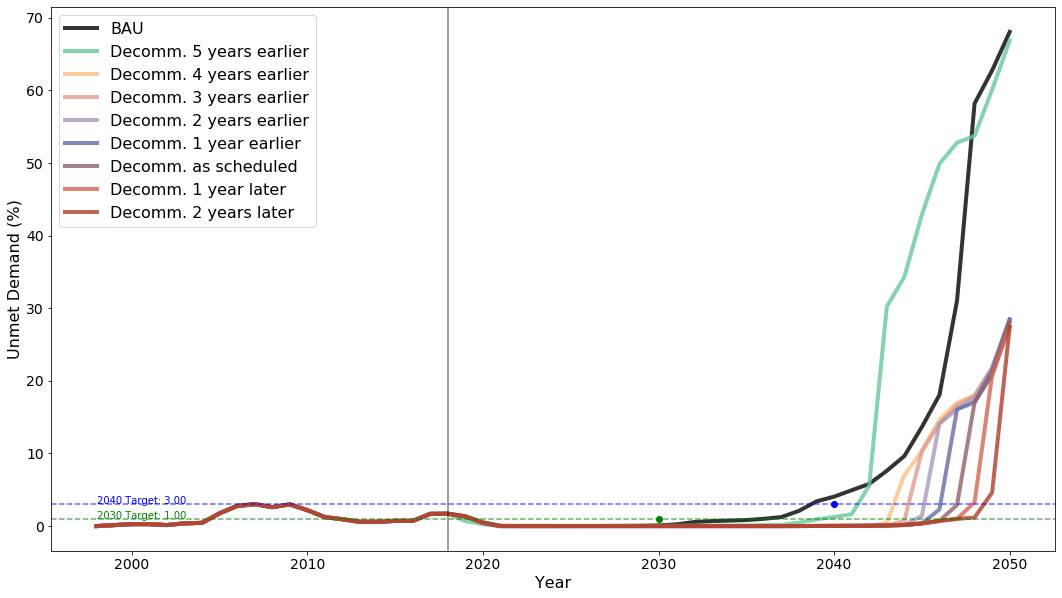

In [953]:
plt.figure(figsize=(18,10))
years = [DT.datetime.strptime(str(int(date)),'%Y') for date in bau_results_df['Time (Year)'].values]
years =  bau_results_df['Time (Year)'].values
plt.plot( years, bau_results_df['unmetPercentageConsumptionPrimary'], color='black', alpha = 0.8, linewidth=4, label='BAU')
plt.plot( years, incPAgenRetm5['unmetPercentageConsumptionPrimary'],  color='#67c999', alpha = 0.8, linewidth=4, label='Decomm. 5 years earlier')
plt.plot( years, incPAgenRetm4['unmetPercentageConsumptionPrimary'],  color='#fcc081',  alpha = 0.8, linewidth=4, label='Decomm. 4 years earlier')
plt.plot( years, incPAgenRetm3['unmetPercentageConsumptionPrimary'],  color='#e39a8c', alpha = 0.8, linewidth=4, label='Decomm. 3 years earlier')
plt.plot( years, incPAgenRetm2['unmetPercentageConsumptionPrimary'],  color='#a899ba',  alpha = 0.8, linewidth=4, label='Decomm. 2 years earlier')
plt.plot( years, incPAgenRetm1['unmetPercentageConsumptionPrimary'],  color='#686ba5',  alpha = 0.8, linewidth=4, label='Decomm. 1 year earlier')
plt.plot( years, incPAgenRet0['unmetPercentageConsumptionPrimary'],  color='#925f66',  alpha = 0.8, linewidth=4, label='Decomm. as scheduled')
plt.plot( years, incPAgenRet1['unmetPercentageConsumptionPrimary'],  color='#d4644e',  alpha = 0.8, linewidth=4, label='Decomm. 1 year later')
plt.plot( years, incPAgenRet2['unmetPercentageConsumptionPrimary'],  color='#ac3f2a',  alpha = 0.8, linewidth=4, label='Decomm. 2 years later')

# Add dot and corresponding text

target = 1

plt.axhline(  target ,ls='--',color='green', alpha = 0.6)
plt.text(years[0], target+0.01, f'2030 Target: {target:.2f}',color='green')
plt.plot(2030, target, 'go')

target = 3
plt.axhline(  target ,ls='--',color='blue', alpha = 0.6)
plt.text(years[0], target+0.01, f'2040 Target: {target:.2f}',color='blue')
plt.plot(2040, target, 'bo')
plt.axvline(2018, ls='-',color='black', alpha = 0.5)

#plt.grid( linestyle='-', linewidth=1)
plt.xlabel('Year', size=16)
plt.ylabel('Unmet Demand (%)', size=16)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.legend(prop={'size':16})

## Other combinations
box 4 options not included as all the combinations did not achieve the VRETs.

box 2 worst-cases:
includePublicallyAnnounced = True;
semiScheduleGenSpotMarket = none (the change of this input can be more difficult to manage, therefore it is only show for illustrative proposes, and other policies that are considered less difficult to achieve are proposed below).

box 3 worst-cases and semiSchedule in primary market:
includePublicallyAnnounced = True;
priceChangeBrownCoal more than 25% more expensive

box 5 best-cases:
includePublicallyAnnounced = True;
nameplateCapacityChangeWind = 50% more capacity;
generationRetirementPeriod = -5

box 3 worst-cases and 5 best-cases without wind capacity changes:
includePublicallyAnnounced = True;
priceChangeBrownCoal more than 20% more expensive
generationRetirementPeriod -5

box 3 worst-cases and 5 best-cases without changes in wind capacity:
includePublicallyAnnounced = True;
priceChangeBrownCoal more than 25% more expensive;
generationRetirementPeriod 1 or 2

FS, 3 and 5 including changes in consumption excluding wind changes:
includePublicallyAnnounced = True;
consumption = Slow change;
priceChangeBrownCoal more than 20% more expensive
generationRetirementPeriod -2 only

box 3 worst-cases and 5 best-cases:
includePublicallyAnnounced = True;
nameplateCapacityChangeWind = 30% or more capacity;
priceChangeBrownCoal = more than 20% more expensive;
generationRetirementPeriod = -1

FS including consumption and box 3 worst-cases and 5 best-cases, without changes in generation retirement:
includePublicallyAnnounced = True;
nameplateCapacityChangeWind = 30% more capacity;
priceChangeBrownCoal = more than 20% more expensive;
consumption = Slow change;

FS including consumption and box 3 worst-cases and 5 best-cases, without changes in generation retirement:
includePublicallyAnnounced = True;
nameplateCapacityChangeWind = 40%;
priceChangeBrownCoal = 20%;
consumption = high DER;

FS including consumption and box 3 worst-cases and 5 best-cases, without changes in generation retirement:
includePublicallyAnnounced = True;
nameplateCapacityChangeWind = 50%;
priceChangeBrownCoal = 20%;
consumption = fast change;

FS including consumption and box 3 worst-cases and 5 best-cases, WITH changes in generation retirement:
includePublicallyAnnounced = True;
nameplateCapacityChangeWind = 20%;
priceChangeBrownCoal = 20%;
consumption = fast change;
generationRetirementPeriod = -1





	


In [638]:
incPAsemiSch1 = pd.read_csv(r'C:/Users/angel/Documents/GitHub/gr4sp/csv/LCTVIC/LCTVICSimDataYearSummary_seed_1627640380484.csv')
incPABC25plus = pd.read_csv(r'C:/Users/angel/Documents/GitHub/gr4sp/csv/LCTVIC/LCTVICSimDataYearSummary_seed_1627984125280.csv')
incPAWincCapGenRet = pd.read_csv(r'C:/Users/angel/Documents/GitHub/gr4sp/csv/LCTVIC/LCTVICSimDataYearSummary_seed_1627979460468.csv')
incPABC20plusGenRet = pd.read_csv(r'C:/Users/angel/Documents/GitHub/gr4sp/csv/LCTVIC/LCTVICSimDataYearSummary_seed_1627982959440.csv')
incPABC20plusGenRetCons = pd.read_csv(r'C:/Users/angel/Documents/GitHub/gr4sp/csv/LCTVIC/LCTVICSimDataYearSummary_seed_1627988861748.csv')
incPABC20plus30WindGenRet = pd.read_csv(r'C:/Users/angel/Documents/GitHub/gr4sp/csv/LCTVIC/LCTVICSimDataYearSummary_seed_1627886490485.csv')



In [639]:
""" Converts household data in tCO2e into total residential data in MtCO2e"""
incPAsemiSch1_GHG_residential_lct = (incPAsemiSch1['GHG Emissions (tCO2-e) per household'] * incPAsemiSch1['Number of Domestic Consumers (households)']) / 1000000.0

""" Applies scaling factor used in simulation, so that data represents total emissions, not only residential (30%)"""
incPAsemiSch1_GHG_total_lct =incPAsemiSch1_GHG_residential_lct / 0.3

"""Overwrite GHG with the data of interest"""
incPAsemiSch1['GHGYear'] = incPAsemiSch1_GHG_total_lct

""" Converts household data in tCO2e into total residential data in MtCO2e"""
incPABC25plus_GHG_residential_lct = (incPABC25plus['GHG Emissions (tCO2-e) per household'] * incPABC25plus['Number of Domestic Consumers (households)']) / 1000000.0

""" Applies scaling factor used in simulation, so that data represents total emissions, not only residential (30%)"""
incPABC25plus_GHG_total_lct =incPABC25plus_GHG_residential_lct / 0.3

"""Overwrite GHG with the data of interest"""
incPABC25plus['GHGYear'] = incPABC25plus_GHG_total_lct

""" Converts household data in tCO2e into total residential data in MtCO2e"""
incPAWincCapGenRet_GHG_residential_lct = (incPAWincCapGenRet['GHG Emissions (tCO2-e) per household'] * incPAWincCapGenRet['Number of Domestic Consumers (households)']) / 1000000.0

""" Applies scaling factor used in simulation, so that data represents total emissions, not only residential (30%)"""
incPAWincCapGenRet_GHG_total_lct =incPAWincCapGenRet_GHG_residential_lct / 0.3

"""Overwrite GHG with the data of interest"""
incPAWincCapGenRet['GHGYear'] = incPAWincCapGenRet_GHG_total_lct

""" Converts household data in tCO2e into total residential data in MtCO2e"""
incPABC20plusGenRet_GHG_residential_lct = (incPABC20plusGenRet['GHG Emissions (tCO2-e) per household'] * incPABC20plusGenRet['Number of Domestic Consumers (households)']) / 1000000.0

""" Applies scaling factor used in simulation, so that data represents total emissions, not only residential (30%)"""
incPABC20plusGenRet_GHG_total_lct =incPABC20plusGenRet_GHG_residential_lct / 0.3

"""Overwrite GHG with the data of interest"""
incPABC20plusGenRet['GHGYear'] = incPABC20plusGenRet_GHG_total_lct

""" Converts household data in tCO2e into total residential data in MtCO2e"""
incPABC20plusGenRetCons_GHG_residential_lct = (incPABC20plusGenRetCons['GHG Emissions (tCO2-e) per household'] * incPABC20plusGenRetCons['Number of Domestic Consumers (households)']) / 1000000.0

""" Applies scaling factor used in simulation, so that data represents total emissions, not only residential (30%)"""
incPABC20plusGenRetCons_GHG_total_lct =incPABC20plusGenRetCons_GHG_residential_lct / 0.3

"""Overwrite GHG with the data of interest"""
incPABC20plusGenRetCons['GHGYear'] = incPABC20plusGenRetCons_GHG_total_lct

""" Converts household data in tCO2e into total residential data in MtCO2e"""
incPABC20plus30WindGenRet_GHG_residential_lct = (incPABC20plus30WindGenRet['GHG Emissions (tCO2-e) per household'] * incPABC20plus30WindGenRet['Number of Domestic Consumers (households)']) / 1000000.0

""" Applies scaling factor used in simulation, so that data represents total emissions, not only residential (30%)"""
incPABC20plus30WindGenRet_GHG_total_lct =incPABC20plus30WindGenRet_GHG_residential_lct / 0.3

"""Overwrite GHG with the data of interest"""
incPABC20plus30WindGenRet['GHGYear'] = incPABC20plus30WindGenRet_GHG_total_lct



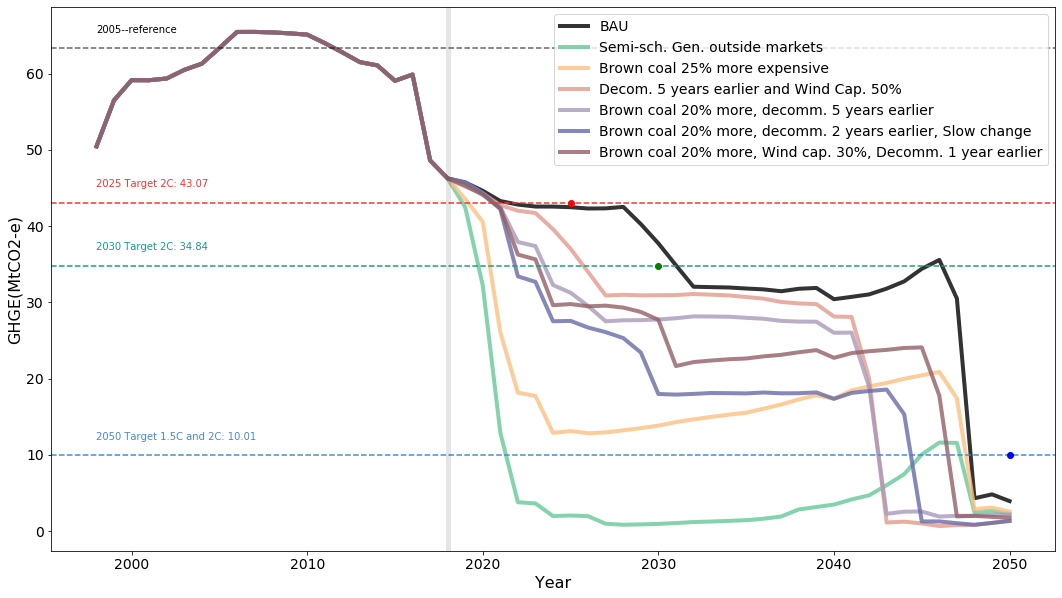

In [644]:
# Figures combinations from box 2 worst-cases PRIM. Include publically annonced in true and semiScheduleGenSpotMarket = none
plt.figure(figsize=(18,10))
years = [DT.datetime.strptime(str(int(date)),'%Y') for date in bau_results_df['Time (Year)'].values]
years =  bau_results_df['Time (Year)'].values
plt.plot( years, bau_results_df['GHGYear'], color='black', alpha = 0.8, linewidth=4, label='BAU')
plt.plot( years, incPAsemiSch1['GHGYear'],  color='#67c999', alpha = 0.8, linewidth=4, label='Semi-sch. Gen. outside markets')
plt.plot( years, incPABC25plus['GHGYear'],  color='#fcc081',  alpha = 0.8, linewidth=4, label='Brown coal 25% more expensive')
plt.plot( years, incPAWincCapGenRet['GHGYear'],  color='#e39a8c', alpha = 0.8, linewidth=4, label='Decom. 5 years earlier and Wind Cap. 50%')
plt.plot( years, incPABC20plusGenRet['GHGYear'],  color='#a899ba',  alpha = 0.8, linewidth=4, label='Brown coal 20% more, decomm. 5 years earlier')
plt.plot( years, incPABC20plusGenRetCons['GHGYear'],  color='#686ba5',  alpha = 0.8, linewidth=4, label='Brown coal 20% more, decomm. 2 years earlier, Slow change')
plt.plot( years, incPABC20plus30WindGenRet['GHGYear'],  color='#925f66',  alpha = 0.8, linewidth=4, label='Brown coal 20% more, Wind cap. 30%, Decomm. 1 year earlier')
# plt.plot( years, incPAgenRet1['GHGYear'],  color='#d4644e',  alpha = 0.8, linewidth=4, label='Decomm. 1 year later')
# plt.plot( years, incPAgenRet2['GHGYear'],  color='#ac3f2a',  alpha = 0.8, linewidth=4, label='Decomm. 2 years later')



# Add dot and corresponding text
reference = bau_results_df[bau_results_df['Time (Year)'] == 2005]['GHGYear'].values

reduction = 0.32

plt.axhline((reference - (reference * reduction)), ls='--',color='#f23535', alpha = 1)

plt.text(years[0], reference - (reference * reduction)+2, f'2025 Target 2C: {((reference - (reference * reduction))[0]):.2f}',color='#f23535')
plt.plot(2025, (reference - (reference * reduction)), 'ro')

reduction = 0.45

plt.axhline((reference - (reference * reduction)) ,ls='--',color='#1b9a8c', alpha = 1)
plt.text(years[0], reference - (reference * reduction)+2, f'2030 Target 2C: {((reference - (reference * reduction))[0]):.2f}',color='#1b9a8c')
plt.plot(2030, (reference - (reference * reduction)), 'go')

reduction = 0.842

plt.axhline((reference - (reference * reduction)) ,ls='--',color='#4e88cb', alpha = 1)
plt.text(years[0], reference - (reference * reduction)+2, f'2050 Target 1.5C and 2C: {((reference - (reference * reduction))[0]):.2f}',color='#4e88cb')
plt.plot(2050, (reference - (reference * reduction)), 'bo')

plt.axvline(2018, ls='-',color='black', alpha = 0.1, lw = 5)

plt.axhline((reference),ls='--',color='black', alpha = 0.6)
plt.text(years[0], reference+2, f'2005--reference',color='black')


#plt.grid( linestyle='-', linewidth=1)
plt.xlabel('Year', size=16)
plt.ylabel('GHGE(MtCO2-e)', size=16)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.legend(prop={'size':14}, loc='upper right')

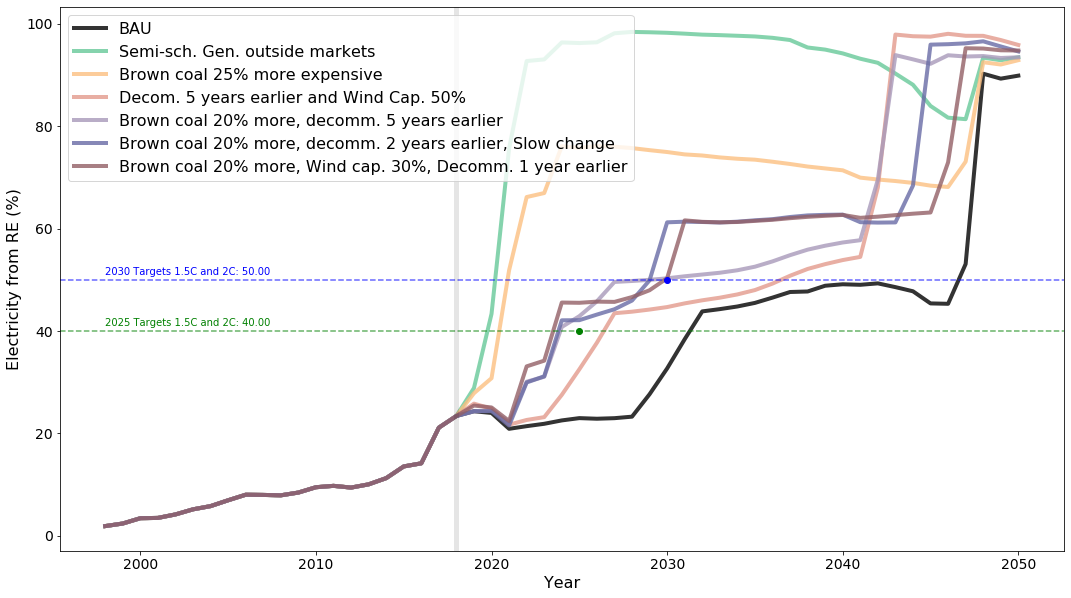

In [645]:
plt.figure(figsize=(18,10))
years = [DT.datetime.strptime(str(int(date)),'%Y') for date in bau_results_df['Time (Year)'].values]
years =  bau_results_df['Time (Year)'].values
plt.plot( years, bau_results_df['Percentage Renewable Production']*100, color='black', alpha = 0.8, linewidth=4, label='BAU')
plt.plot( years, incPAsemiSch1['Percentage Renewable Production']*100,  color='#67c999', alpha = 0.8, linewidth=4, label='Semi-sch. Gen. outside markets')
plt.plot( years, incPABC25plus['Percentage Renewable Production']*100,  color='#fcc081',  alpha = 0.8, linewidth=4, label='Brown coal 25% more expensive')
plt.plot( years, incPAWincCapGenRet['Percentage Renewable Production']*100,  color='#e39a8c', alpha = 0.8, linewidth=4, label='Decom. 5 years earlier and Wind Cap. 50%')
plt.plot( years, incPABC20plusGenRet['Percentage Renewable Production']*100,  color='#a899ba',  alpha = 0.8, linewidth=4, label='Brown coal 20% more, decomm. 5 years earlier')
plt.plot( years, incPABC20plusGenRetCons['Percentage Renewable Production']*100,  color='#686ba5',  alpha = 0.8, linewidth=4, label='Brown coal 20% more, decomm. 2 years earlier, Slow change')
plt.plot( years, incPABC20plus30WindGenRet['Percentage Renewable Production']*100,  color='#925f66',  alpha = 0.8, linewidth=4, label='Brown coal 20% more, Wind cap. 30%, Decomm. 1 year earlier')

# Add dot and corresponding text

target = 40

plt.axhline(  target ,ls='--',color='green', alpha = 0.6)
plt.text(years[0], target+1, f'2025 Targets 1.5C and 2C: {target:.2f}',color='green')
plt.plot(2025, target, 'go')

target = 50
plt.axhline(  target ,ls='--',color='blue', alpha = 0.6)
plt.text(years[0], target+1, f'2030 Targets 1.5C and 2C: {target:.2f}',color='blue')
plt.plot(2030, target, 'bo')
plt.axvline(2018, ls='-',color='black', alpha = 0.1, lw = 5)

#plt.grid( linestyle='-', linewidth=1)
plt.xlabel('Year', size=16)
plt.ylabel('Electricity from RE (%)', size=16)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.legend(prop={'size':16})

In [646]:
#inclPA and semi-sched gen spot market as none
incPAsemiSch1LCTprimary = incPAsemiSch1['System Production Primary Spot']
incPAsemiSch1LCTunmetPrimary = incPAsemiSch1['Primary Total Unmet Demand (MWh)']
incPAsemiSch1LCToff = incPAsemiSch1['System Production Off Spot']

incPAsemiSch1LCTconsumptionPrimary = incPAsemiSch1LCTprimary + incPAsemiSch1LCToff + incPAsemiSch1LCTunmetPrimary
incPAsemiSch1LCTpercentageUnmetPrimary = (incPAsemiSch1LCTunmetPrimary/incPAsemiSch1LCTconsumptionPrimary)*100
incPAsemiSch1LCTwhere_are_NaNs = np.isnan(incPAsemiSch1LCTpercentageUnmetPrimary)
incPAsemiSch1LCTpercentageUnmetPrimary[incPAsemiSch1LCTwhere_are_NaNs] = 0
incPAsemiSch1['unmetPercentageConsumptionPrimary'] = incPAsemiSch1LCTpercentageUnmetPrimary

# brown coal 25% more expensive

incPABC25plusLCTprimary = incPABC25plus['System Production Primary Spot']
incPABC25plusLCTunmetPrimary = incPABC25plus['Primary Total Unmet Demand (MWh)']
incPABC25plusLCToff = incPABC25plus['System Production Off Spot']

incPABC25plusLCTconsumptionPrimary = incPABC25plusLCTprimary + incPABC25plusLCToff + incPABC25plusLCTunmetPrimary
incPABC25plusLCTpercentageUnmetPrimary = (incPABC25plusLCTunmetPrimary/incPABC25plusLCTconsumptionPrimary)*100
incPABC25plusLCTwhere_are_NaNs = np.isnan(incPABC25plusLCTpercentageUnmetPrimary)
incPABC25plusLCTpercentageUnmetPrimary[incPABC25plusLCTwhere_are_NaNs] = 0
incPABC25plus['unmetPercentageConsumptionPrimary'] = incPABC25plusLCTpercentageUnmetPrimary

# Wind capacity double, decommmisioning of brown coal 5 years earlier

incPAWincCapGenRetLCTprimary = incPAWincCapGenRet['System Production Primary Spot']
incPAWincCapGenRetLCTunmetPrimary = incPAWincCapGenRet['Primary Total Unmet Demand (MWh)']
incPAWincCapGenRetLCToff = incPAWincCapGenRet['System Production Off Spot']

incPAWincCapGenRetLCTconsumptionPrimary =incPAWincCapGenRetLCTprimary + incPAWincCapGenRetLCToff + incPAWincCapGenRetLCTunmetPrimary
incPAWincCapGenRetLCTpercentageUnmetPrimary = (incPAWincCapGenRetLCTunmetPrimary/incPAWincCapGenRetLCTconsumptionPrimary)*100
incPAWincCapGenRetLCTwhere_are_NaNs = np.isnan(incPAWincCapGenRetLCTpercentageUnmetPrimary)
incPAWincCapGenRetLCTpercentageUnmetPrimary[incPAWincCapGenRetLCTwhere_are_NaNs] = 0
incPAWincCapGenRet['unmetPercentageConsumptionPrimary'] = incPAWincCapGenRetLCTpercentageUnmetPrimary


# Brown coal 20% more expensive, decommmisioning of brown coal 5 years earlier

incPABC20plusGenRetLCTprimary = incPAWincCapGenRet['System Production Primary Spot']
incPABC20plusGenRetLCTunmetPrimary = incPAWincCapGenRet['Primary Total Unmet Demand (MWh)']
incPABC20plusGenRetLCToff = incPAWincCapGenRet['System Production Off Spot']

incPABC20plusGenRetLCTconsumptionPrimary =incPABC20plusGenRetLCTprimary + incPABC20plusGenRetLCToff + incPABC20plusGenRetLCTunmetPrimary
incPABC20plusGenRetLCTpercentageUnmetPrimary = (incPABC20plusGenRetLCTunmetPrimary/incPABC20plusGenRetLCTconsumptionPrimary)*100
incPABC20plusGenRetLCTwhere_are_NaNs = np.isnan(incPABC20plusGenRetLCTpercentageUnmetPrimary)
incPABC20plusGenRetLCTpercentageUnmetPrimary[incPABC20plusGenRetLCTwhere_are_NaNs] = 0
incPABC20plusGenRet['unmetPercentageConsumptionPrimary'] = incPABC20plusGenRetLCTpercentageUnmetPrimary

# Brown coal 20% more expensive, decommmisioning of brown coal 2 years earlier and consumption scenario "Slow change"
incPABC20plusGenRetConsLCTprimary = incPABC20plusGenRetCons['System Production Primary Spot']
incPABC20plusGenRetConsLCTunmetPrimary = incPABC20plusGenRetCons['Primary Total Unmet Demand (MWh)']
incPABC20plusGenRetConsoff = incPAWincCapGenRet['System Production Off Spot']

incPABC20plusGenRetConsLCTconsumptionPrimary =incPABC20plusGenRetConsLCTprimary + incPABC20plusGenRetConsoff + incPABC20plusGenRetConsLCTunmetPrimary
incPABC20plusGenRetConsLCTpercentageUnmetPrimary = (incPABC20plusGenRetConsLCTunmetPrimary/incPABC20plusGenRetLCTconsumptionPrimary)*100
incPABC20plusGenRetConsLCTwhere_are_NaNs = np.isnan(incPABC20plusGenRetConsLCTpercentageUnmetPrimary)
incPABC20plusGenRetConsLCTpercentageUnmetPrimary[incPABC20plusGenRetConsLCTwhere_are_NaNs] = 0
incPABC20plusGenRetCons['unmetPercentageConsumptionPrimary'] = incPABC20plusGenRetConsLCTpercentageUnmetPrimary

# Brown coal 20% more expensive, wind 50% more capacity decommmisioning of brown coal 1 year earlier
incPABC20plus30WindGenRetLCTprimary = incPABC20plus30WindGenRet['System Production Primary Spot']
incPABC20plus30WindGenRetLCTunmetPrimary = incPABC20plus30WindGenRet['Primary Total Unmet Demand (MWh)']
incPABC20plus30WindGenRetoff = incPABC20plus30WindGenRet['System Production Off Spot']

incPABC20plus30WindGenRetLCTconsumptionPrimary =incPABC20plus30WindGenRetLCTprimary + incPABC20plus30WindGenRetoff + incPABC20plus30WindGenRetLCTunmetPrimary
incPABC20plus30WindGenRetLCTpercentageUnmetPrimary = (incPABC20plus30WindGenRetLCTunmetPrimary/incPABC20plus30WindGenRetLCTconsumptionPrimary)*100
incPABC20plus30WindGenRetLCTwhere_are_NaNs = np.isnan(incPABC20plus30WindGenRetLCTpercentageUnmetPrimary)
incPABC20plus30WindGenRetLCTpercentageUnmetPrimary[incPABC20plus30WindGenRetLCTwhere_are_NaNs] = 0
incPABC20plus30WindGenRet['unmetPercentageConsumptionPrimary'] = incPABC20plus30WindGenRetLCTpercentageUnmetPrimary



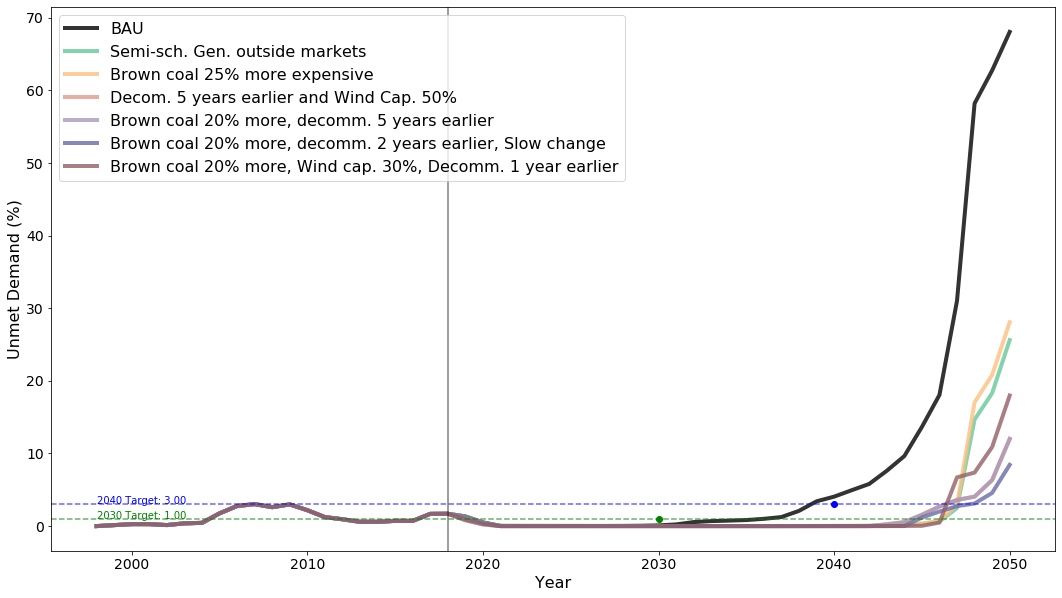

In [647]:
plt.figure(figsize=(18,10))
years = [DT.datetime.strptime(str(int(date)),'%Y') for date in bau_results_df['Time (Year)'].values]
years =  bau_results_df['Time (Year)'].values
plt.plot( years, bau_results_df['unmetPercentageConsumptionPrimary'], color='black', alpha = 0.8, linewidth=4, label='BAU')
plt.plot( years, incPAsemiSch1['unmetPercentageConsumptionPrimary'],  color='#67c999', alpha = 0.8, linewidth=4, label='Semi-sch. Gen. outside markets')
plt.plot( years, incPABC25plus['unmetPercentageConsumptionPrimary'],  color='#fcc081',  alpha = 0.8, linewidth=4, label='Brown coal 25% more expensive')
plt.plot( years, incPAWincCapGenRet['unmetPercentageConsumptionPrimary'],  color='#e39a8c', alpha = 0.8, linewidth=4, label='Decom. 5 years earlier and Wind Cap. 50%')
plt.plot( years, incPABC20plusGenRet['unmetPercentageConsumptionPrimary'],  color='#a899ba',  alpha = 0.8, linewidth=4, label='Brown coal 20% more, decomm. 5 years earlier')
plt.plot( years, incPABC20plusGenRetCons['unmetPercentageConsumptionPrimary'],  color='#686ba5',  alpha = 0.8, linewidth=4, label='Brown coal 20% more, decomm. 2 years earlier, Slow change')
plt.plot( years, incPABC20plus30WindGenRet['unmetPercentageConsumptionPrimary'],  color='#925f66',  alpha = 0.8, linewidth=4, label='Brown coal 20% more, Wind cap. 30%, Decomm. 1 year earlier')


# Add dot and corresponding text

target = 1

plt.axhline(  target ,ls='--',color='green', alpha = 0.6)
plt.text(years[0], target+0.01, f'2030 Target: {target:.2f}',color='green')
plt.plot(2030, target, 'go')

target = 3
plt.axhline(  target ,ls='--',color='blue', alpha = 0.6)
plt.text(years[0], target+0.01, f'2040 Target: {target:.2f}',color='blue')
plt.plot(2040, target, 'bo')
plt.axvline(2018, ls='-',color='black', alpha = 0.5)

#plt.grid( linestyle='-', linewidth=1)
plt.xlabel('Year', size=16)
plt.ylabel('Unmet Demand (%)', size=16)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.legend(prop={'size':16})